In [42]:
#!/usr/bin/env python
# make sure to install these packages before running:
# pip install pandas
# pip install bokeh
import numpy as np
import pandas as pd
import datetime
import urllib
import pylab as plt
import seaborn
    
from bokeh.plotting import *
from bokeh.models import HoverTool
from collections import OrderedDict

query = ("https://data.sfgov.org/resource/2iym-9kfb.json")
raw_data = pd.read_json(query)	

In [43]:
raw_data.drop([u':@computed_region_bh8s_q3mv', u':@computed_region_fyvs_ahh9',
       u':@computed_region_p5aj_wyqh', u':@computed_region_rxqg_mtj9',
       u':@computed_region_yftq_j783'], axis = 1, inplace =True)

In [44]:
Smart_count = raw_data[raw_data.smart_mete=='Y'].groupby(by='sfparkarea').count()
No_Smart_count = raw_data[raw_data.smart_mete=='N'].groupby(by='sfparkarea').count()

In [45]:
Smart_count.sum()[0]

235

In [46]:
No_Smart_count.sum()[0]

157

In [47]:
235./(235+157)*100

59.94897959183674

In [48]:
Smart_count

,activesens,cap_color,jurisdicti,location,meter_type,ms_id,ms_spaceid,on_off_str,osp_id,post_id,ratearea,smart_mete,street_num,street_seg,streetname
sfparkarea,,,,,,,,,,,,,,,
Civic Center,38,38,38,38,38,38,38,38,38,38,38,38,38,38,38
Downtown,28,28,28,28,28,28,28,28,28,28,28,28,28,28,28
Fillmore,23,23,23,23,23,23,23,23,23,23,23,23,23,23,23
Fisherman's Wharf,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20
Marina,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14
Mission,41,41,41,41,41,41,41,41,41,41,41,41,41,41,41
South Embarcadero,71,71,71,71,71,71,71,71,71,71,71,71,71,71,71


In [49]:
No_Smart_count

,activesens,cap_color,jurisdicti,location,meter_type,ms_id,ms_spaceid,on_off_str,osp_id,post_id,ratearea,smart_mete,street_num,street_seg,streetname
sfparkarea,,,,,,,,,,,,,,,
Civic Center,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17
Downtown,77,77,77,77,77,77,77,77,77,77,77,77,77,77,77
Marina,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8
Mission,23,23,23,23,23,23,23,23,23,23,23,23,23,23,23
South Embarcadero,32,32,32,32,32,32,32,32,32,32,32,32,32,32,32


In [50]:
Smart_count.index

Index([u'Civic Center', u'Downtown', u'Fillmore', u'Fisherman's Wharf',
       u'Marina', u'Mission', u'South Embarcadero'],
      dtype='object', name=u'sfparkarea')

In [51]:
No_Smart_Parking = pd.DataFrame(Smart_count.index)
No_Smart_Parking['count'] = [17,77,0,0,8,23,32]

In [52]:
No_Smart_Parking

,sfparkarea,count
0,Civic Center,17
1,Downtown,77
2,Fillmore,0
3,Fisherman's Wharf,0
4,Marina,8
5,Mission,23
6,South Embarcadero,32


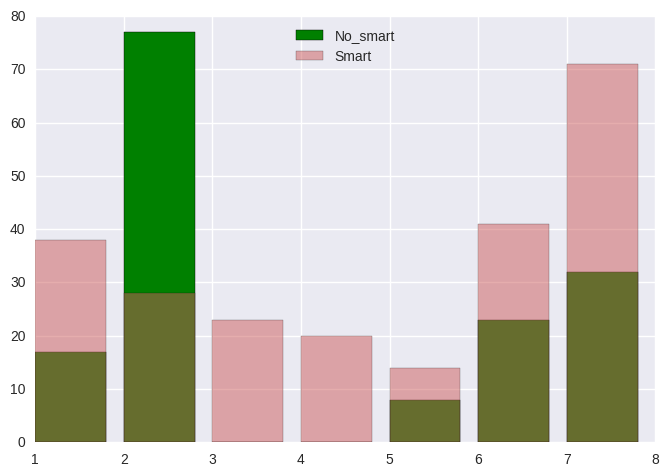

In [75]:
plt.figure()
plt.bar ([1,2,3,4,5,6,7], [17,77,0,0,8,23,32], color = 'Green', alpha = 1, label = 'No_smart')
plt.bar ([1,2,3,4,5,6,7], [38,28,23,20,14,41,71], color = 'IndianRed', alpha = 0.5, label = 'Smart')
plt.legend(loc='best')
plt.show()